In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize #package for flattening json in pandas df
from PIL import Image

import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem
from scipy.stats import t
import statistics
import math


In [2]:
info_car2PPO_episode_1  = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/pre_IRL_anaylysis_pedestrian/IRL_pretest_result_pedestrian.json', lines=True)


In [3]:
info_car2PPO_episode_1['reward'].replace([np.inf, -np.inf],0, inplace=True)
info_car2PPO_episode_1['reward'].replace(0,info_car2PPO_episode_1['reward'].max()
 ,inplace=True)


info_car2PPO_episode_1['reward']

0       -3.326678
1       -3.798856
2       -4.597444
3       -3.768379
4       -1.851517
           ...   
29995   -6.213132
29996   -4.871531
29997   -5.099636
29998   -5.269358
29999   -5.222051
Name: reward, Length: 30000, dtype: float64

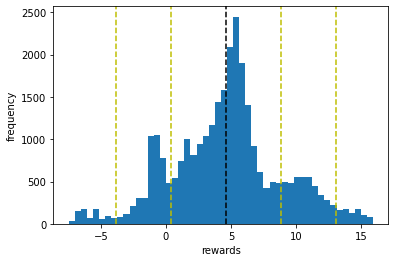

In [4]:
plt.hist(info_car2PPO_episode_1['reward'],bins=50,histtype='stepfilled')
plt.xlabel('rewards')
plt.ylabel('frequency')
m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

plt.show()

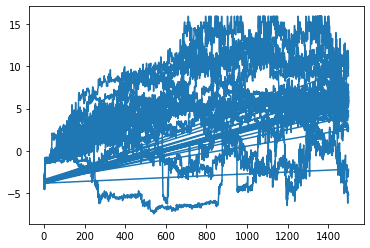

In [5]:
plt.plot(info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'])


In [6]:
myMean = info_car2PPO_episode_1['reward'].mean()
myMean

4.6084378452143335

In [7]:
SE = sem(info_car2PPO_episode_1['reward'])
SE

0.024410951030503895

In [8]:
confLevel = 0.95

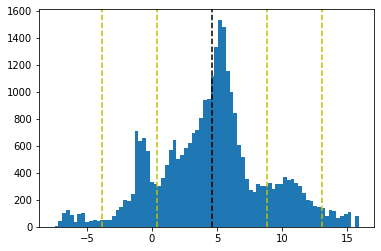

In [9]:
plt.hist(info_car2PPO_episode_1['reward'],bins=80)

m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')
Confidence_interval = sd/math.sqrt(3982)
Confidence_interval = Confidence_interval*1.960


plt.show()

In [10]:
print ("Mean : ", m)
print ("Std Deviation : ", sd)
print ("1st Std Interval : ", m-sd , m+sd )
print ("2nd Std Interval : ", m - 2*sd , m + 2*sd )
print ("Confidence Interval : ", Confidence_interval)

print ("Confidence Interval : ", m - Confidence_interval , m + Confidence_interval)


Mean :  4.6084378452143335
Std Deviation :  4.228100744590859
1st Std Interval :  0.3803371006234748 8.836538589805192
2nd Std Interval :  -3.847763643967384 13.064639334396052
Confidence Interval :  0.13132601629539375
Confidence Interval :  4.4771118289189396 4.7397638615097275


In [11]:
t.interval(0.65,info_car2PPO_episode_1['reward'],loc=m, scale=sd)


(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]))

<AxesSubplot:xlabel='reward', ylabel='Density'>

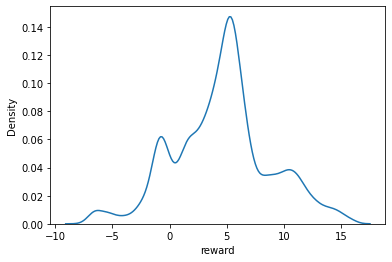

In [12]:
sns.kdeplot(info_car2PPO_episode_1['reward'],)


<AxesSubplot:xlabel='state', ylabel='Density'>

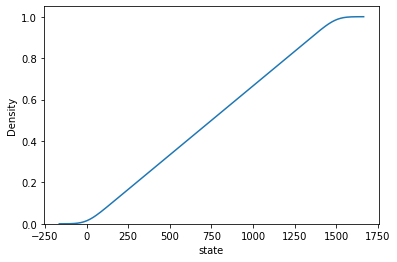

In [14]:
sns.kdeplot(
    data=info_car2PPO_episode_1['reward'], x=info_car2PPO_episode_1['state'],
    cumulative=True, common_norm=False, common_grid=True,
)

<AxesSubplot:xlabel='state', ylabel='reward'>

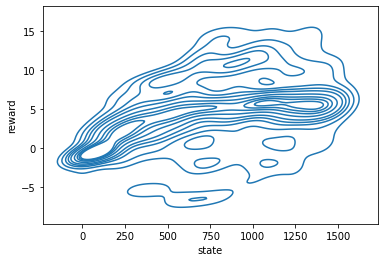

In [15]:
geyser = sns.load_dataset("geyser")
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward")

<AxesSubplot:xlabel='state', ylabel='reward'>

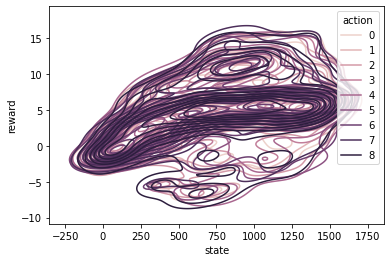

In [16]:
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward", hue="action"
)


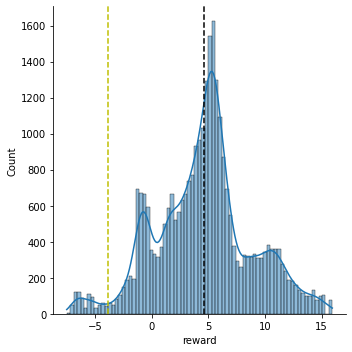

In [17]:
sns.displot(data=info_car2PPO_episode_1, x="reward", kde=True)
plt.axvline(m, color='k', linestyle='dashed')
# plt.axvline(m+sd, color='y', linestyle='dashed')
# plt.axvline(m-sd, color='y', linestyle='dashed')

# plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

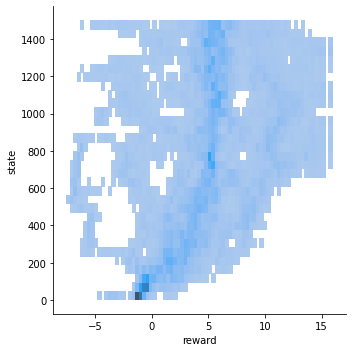

In [53]:
sns.displot(data=info_car2PPO_episode_1, x="reward", y="state",)


<AxesSubplot:xlabel='reward', ylabel='state'>

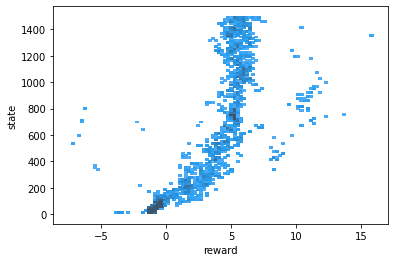

In [59]:
sns.histplot(
    info_car2PPO_episode_1, x="reward", y="state",
    bins=100 ,
    pthresh=.5, pmax=.95,
)

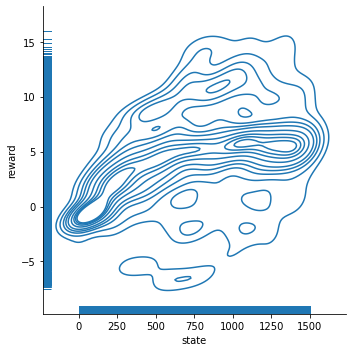

In [19]:
g = sns.displot(data=info_car2PPO_episode_1, x="state", y="reward", kind="kde", rug=True)


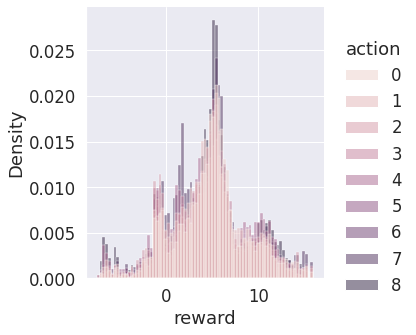

In [15]:

sns.displot(info_car2PPO_episode_1, x="reward", hue="action", stat="density")


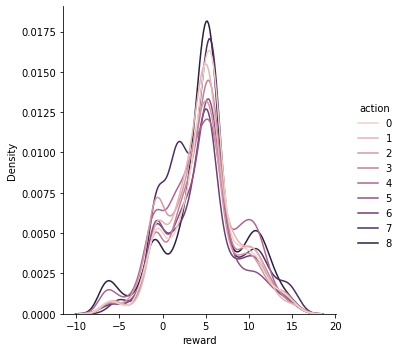

In [8]:
sns.displot(info_car2PPO_episode_1, x="reward", hue="action", kind="kde")


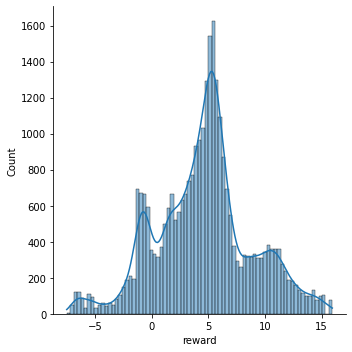

In [22]:
sns.displot(info_car2PPO_episode_1, x="reward", kde=True)


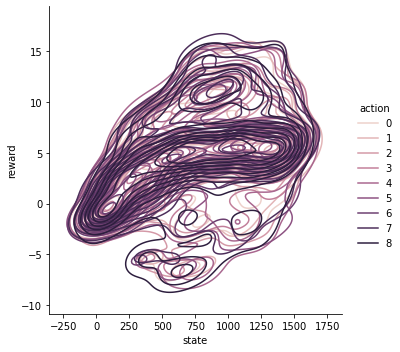

In [23]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", hue="action", kind="kde")


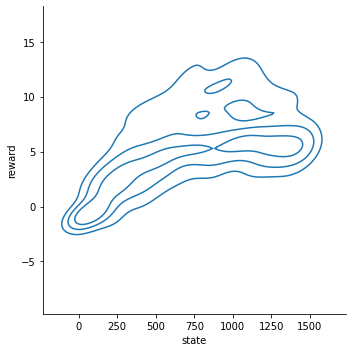

In [24]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", kind="kde", thresh=.2, levels=4)


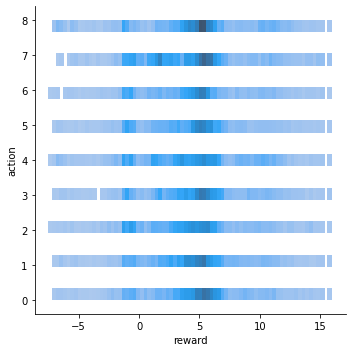

In [5]:
sns.displot(info_car2PPO_episode_1, x="reward", y="action", )


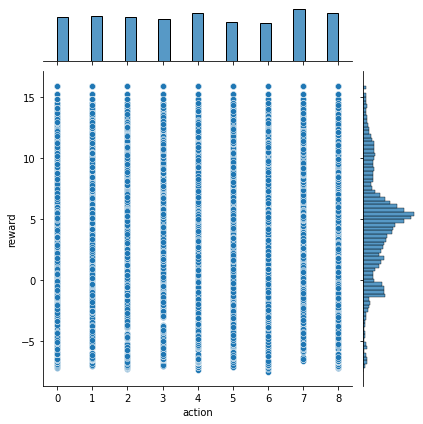

In [26]:
sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward")


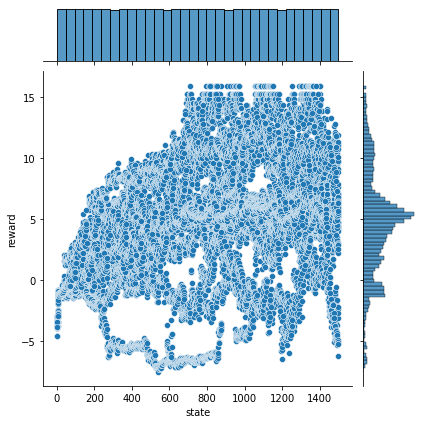

In [27]:
sns.jointplot(data=info_car2PPO_episode_1, x="state", y="reward")


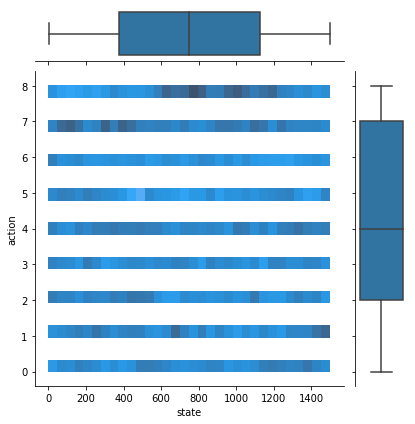

In [6]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="action")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

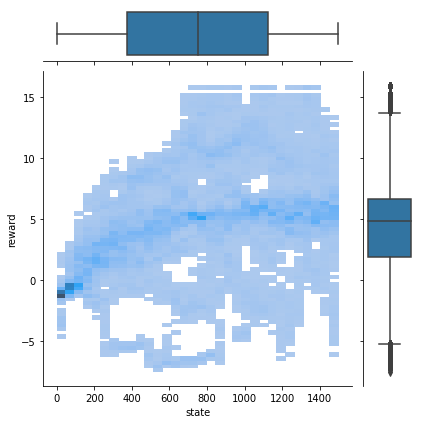

In [36]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

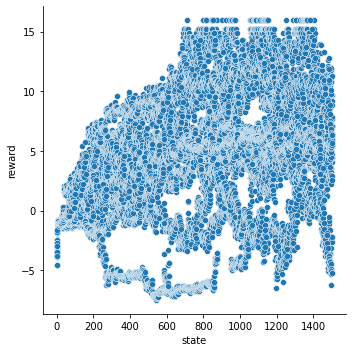

In [47]:
sns.relplot(data=info_car2PPO_episode_1, x="state", y="reward")
# sns.rugplot(data=info_car2PPO_episode_1, x="bill_length_mm", y="bill_depth_mm")

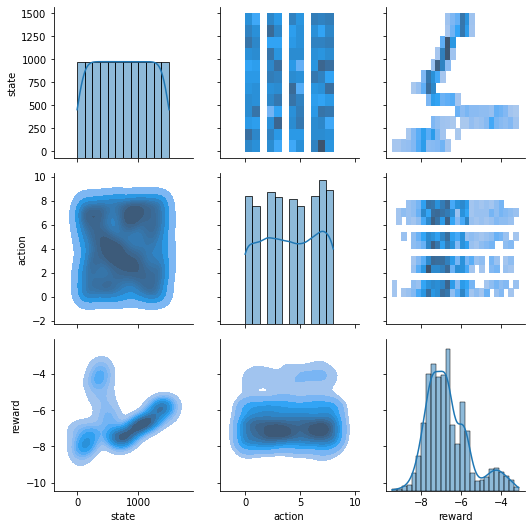

In [24]:
g = sns.PairGrid(info_car2PPO_episode_1)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reward'>

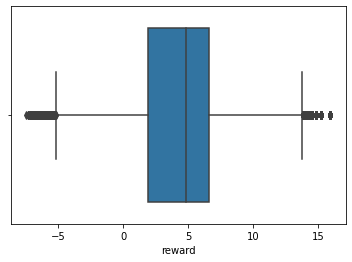

In [22]:
sns.boxplot(info_car2PPO_episode_1['reward'])


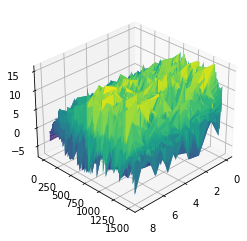

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 

 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(30, 45)

ax.plot_trisurf(info_car2PPO_episode_1['action'], info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 


In [13]:
# Episode 1

# info_car1 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/pre_IRL_anaylysis_pedestrian/info_car1.json', lines=True)
# info_car1 = pd.concat([info_car1.drop(['control'], axis=1), info_car1['control'].apply(pd.Series)], axis=1)
info_car2 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/pre_IRL_anaylysis_pedestrian/info_car2.json', lines=True)
info_car2 = pd.concat([info_car2.drop(['control'], axis=1), info_car2['control'].apply(pd.Series)], axis=1)
info_pedestrian = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/pre_IRL_anaylysis_pedestrian/info_pedestrian1.json', lines=True)
info_pedestrian = pd.concat([info_pedestrian.drop(['control'], axis=1), info_pedestrian['control'].apply(pd.Series)], axis=1)


In [62]:
info_car2.shape

(30000, 35)

In [25]:
print((info_car2['collision_vehicles']!= 0).values.sum()/30000,"collision_vehicles")
print((info_car2['collision_other']!= 0).values.sum()/30000, "collision_other")
print((info_car2['collision_pedestrians']!= 0).values.sum()/30000, "collision_pedestrian")
print((info_car2['intersection_offroad'] != 0).values.sum()/30000,"intersection_offroad")
print ((info_car2['intersection_otherlane'] != 0).values.sum()/30000, "intersection_otherlane")


0.0 collision_vehicles
0.0 collision_other
0.1148 collision_pedestrian
0.2458 intersection_offroad
0.2458 intersection_otherlane


In [7]:
SE_CO = sem(info_car2['collision_other'] != 0)
print (SE_CO)
SE_CP = sem(info_car2['collision_pedestrians'] != 0)
print (SE_CP)
SE_OS = sem(info_car2['intersection_otherlane'] != 0)
print (SE_OS)

0.0
0.0018405103230558029
0.011827760292229927


In [59]:
mean_collision_pedestrians = []
for chunk in np.array_split(info_car2['collision_pedestrians'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_collision_pedestrians.append((res))
    # print (x, " : ", res)
mean_collision_pedestrians = statistics.mean(mean_collision_pedestrians)
mean_collision_pedestrians

803.8

In [60]:
mean_intersection_offroad = []
for chunk in np.array_split(info_car2['intersection_offroad'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_intersection_offroad.append((res))
    # print (x, " : ", res)
mean_intersection_offroad = statistics.mean(mean_intersection_offroad)
mean_intersection_offroad

213.2

In [30]:
print (info_car2['collision_vehicles'].idxmax())
print (info_car2['collision_other'].idxmax())
print (info_car2['collision_pedestrians'].idxmax())
print (info_car2['intersection_offroad'].idxmax())

0
0
1408
6377


In [5]:
print (info_car2['collision_vehicles'].idxmax()*0.134)
print (info_car2['collision_other'].idxmax()*0.134)
print (info_car2['collision_pedestrians'].idxmax()*0.134)
print (info_car2['intersection_offroad'].idxmax()*0.134)

# 268
# 0.134

0.0
0.0
188.67200000000003
854.518


In [ ]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)

# ax1.scatter(info_car2['x'][3001:4500], info_car2['y'][3001:4500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian['x'][3001:4500],info_pedestrian['y'][3001:4500], s=10, c='r', marker="o", label='car3')




# plt.legend(loc='upper left')
# plt.show()

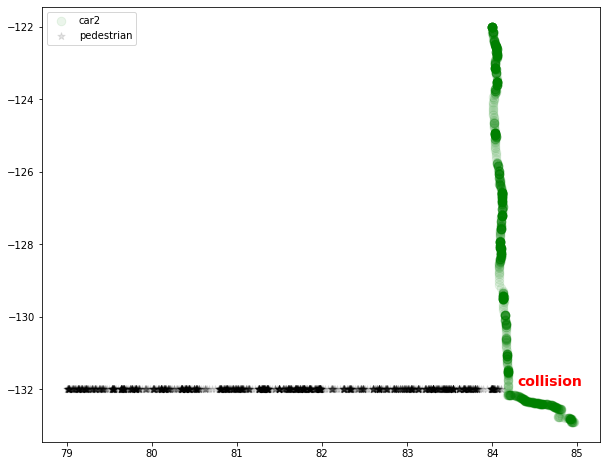

In [99]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)

# ax1.scatter(info_car2['x'][3001:4500], info_car2['y'][3001:4500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian['x'][3001:4500],info_pedestrian['y'][3001:4500], s=10, c='r', marker="o", label='car3')
# ax1.scatter(info_car2['x'][13001:14500], info_car2['y'][13001:14500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian['x'][13001:14500],info_pedestrian['y'][13001:14500], s=10, c='r', marker="o", label='car3')

# ax1.scatter(info_car2['x'][9001:10500], info_car2['y'][9001:10500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian['x'][9001:10500],info_pedestrian['y'][9001:10500], s=10, c='r', marker="o", label='car3')

ax1.scatter(info_car2['x'][12001:13500], info_car2['y'][12001:13500],s=300, c='green', marker=".", label='car2',alpha =0.08,)
ax1.scatter(info_pedestrian['x'][12001:13500],info_pedestrian['y'][12001:13500], s=60, c='black', marker="*", label='pedestrian',alpha =0.1,)

# ax1.scatter(info_car2['x'][16501:17500], info_car2['y'][16501:17500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian['x'][16501:17500],info_pedestrian['y'][16501:17500], s=10, c='r', marker="o", label='car3')


# ax1.scatter(info_car2['x'][20501:22000], info_car2['y'][20501:22000], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian['x'][20501:22000],info_pedestrian['y'][20501:22000], s=10, c='r', marker="o", label='car3')

# Text Annotate

plt.text(84.3, -131.9, "collision", horizontalalignment='left', size='14', color='red', weight='semibold')



plt.legend(loc='upper left')
plt.show()

In [80]:
mean_speed = []
for chunk in np.array_split(info_car2['forward_speed'], 20):
    mean_speed.append(statistics.mean(chunk))
mean_speed

[-0.0007021165090488866,
 0.0022788002248995617,
 0.006117625336467934,
 0.004803099603069886,
 -0.002042514126999026,
 0.005714724486618803,
 0.0041180876544102,
 0.002018560731415563,
 0.004885813492570564,
 0.0031338465778136516,
 0.003068405742195948,
 0.009898587770772705,
 0.0003255212113202108,
 0.0019295824643896418,
 0.0021963253029414313,
 0.006928531752640195,
 0.006044268847917469,
 0.00632393427326448,
 -0.0013876252850448182,
 0.03784336919877943]

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

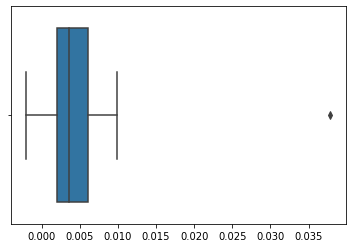

In [81]:
sns.boxplot(mean_speed)


In [84]:
mean_distance = []
for chunk in np.array_split(info_car2['distance_to_goal_euclidean'], 20):
    mean_distance.append(statistics.mean(chunk))

mean_distance

[44.351218373289626,
 44.044123239111904,
 44.45024045508106,
 44.39285616962031,
 43.99351884698932,
 44.992009762536746,
 44.27392695255152,
 44.51686999219205,
 44.32801932299789,
 44.508108629785475,
 44.230648104680974,
 44.24434184103663,
 44.03956157421044,
 44.24966148717405,
 44.28555937591054,
 44.93732868522043,
 44.30375051311725,
 44.25218383449274,
 43.91836580092761,
 50.34550292316264]

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

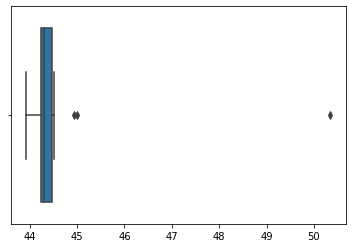

In [85]:
sns.boxplot(mean_distance)


In [16]:
df = pd.DataFrame()
df['step'] = info_car2['step']
df['reward'] = info_car2PPO_episode_1['reward']

No handles with labels found to put in legend.


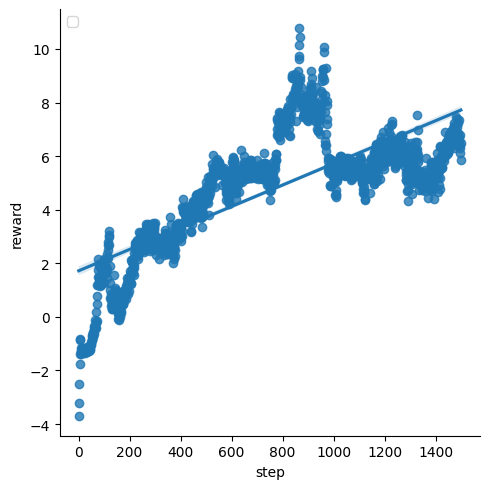

In [25]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# ax1.scatter(info_car2['step'][3001:4500], info_car2PPO_episode_1['reward'][3001:4500], s=10, c='b', marker="o", label='car2')
sns.lmplot(x='step', y='reward', data=df[3001:4500])


plt.legend(loc='upper left')
plt.show()

In [27]:
mean_reward= []
for chunk in np.array_split(info_car2PPO_episode_1['reward'], 20):
    mean_reward.append(statistics.mean(chunk))

mean_reward

[inf,
 3.96324595268,
 4.713296214666666,
 3.431708951866667,
 inf,
 -0.90220349946,
 4.88528493096,
 4.823113057113333,
 5.016614265706667,
 5.220645144633333,
 7.3641644669933335,
 5.488887258306667,
 4.474886051706667,
 5.095374107126666,
 4.09138706378,
 -1.6201946813266666,
 4.626156768553333,
 4.131944877266666,
 8.88142337014,
 0.8194070926933333]

## Only for Paper Visualization

### RQ1

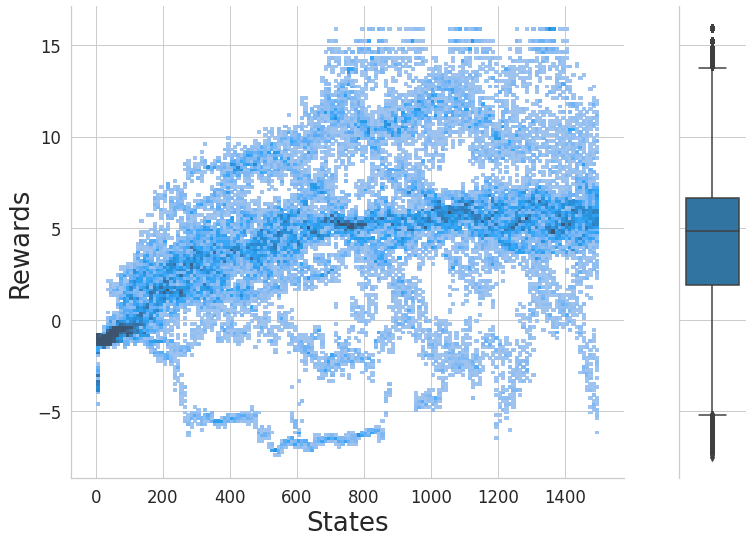

In [8]:
sns.reset_orig()

color = sns.color_palette()

sns.set(font_scale = 1.5)
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid")

joint = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward")

joint.plot_joint(sns.histplot,color=color[0],bins=150, pmax=.95,)
joint.plot_marginals(sns.boxplot, 
                     color=color[0])

joint.fig.tight_layout()

# plt.legend(loc='lower right')
joint.fig.set_figwidth(12)
joint.fig.set_figheight(10)

joint.ax_marg_x.remove()

joint.set_axis_labels('States','Rewards',fontsize=26)

plt.tick_params(axis='both', which='major', labelsize=34)

# plt.tick_params(labelsize=16)
plt.savefig("RQ1_pedestrian_1.pdf")


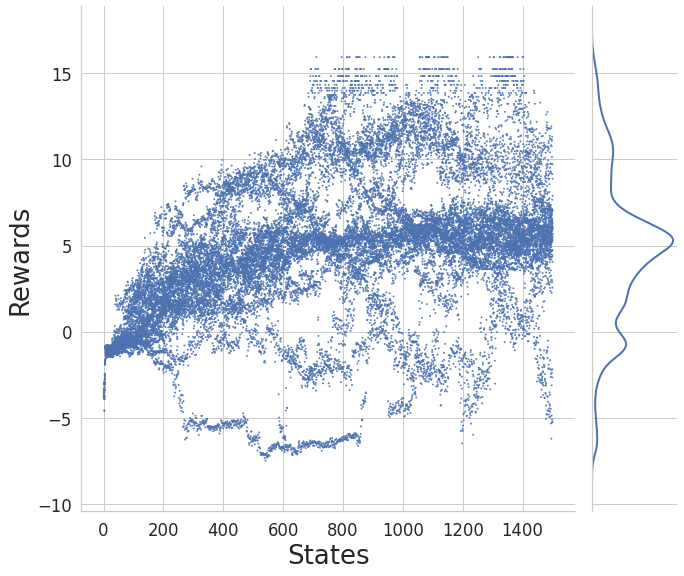

In [14]:
sns.reset_orig()
sns.set(font_scale = 1.5)
color = sns.color_palette()

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid")

my_palette = sns.color_palette("pastel")


g = sns.JointGrid()
x, y = info_car2PPO_episode_1["state"], info_car2PPO_episode_1["reward"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=0.5, linewidth=1.2, ax=g.ax_joint,palette=my_palette)
# sns.histplot(x=x, fill=False, linewidth=1, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y,palette=my_palette)



g.fig.set_figwidth(10)
g.fig.set_figheight(10)

# joint.fig.tight_layout()

g.ax_marg_x.remove()

g.set_axis_labels('States','Rewards',fontsize=26)
plt.tick_params(labelsize=32)
plt.savefig("RQ1_pedestrian_2.jpg", bbox_inches = "tight")


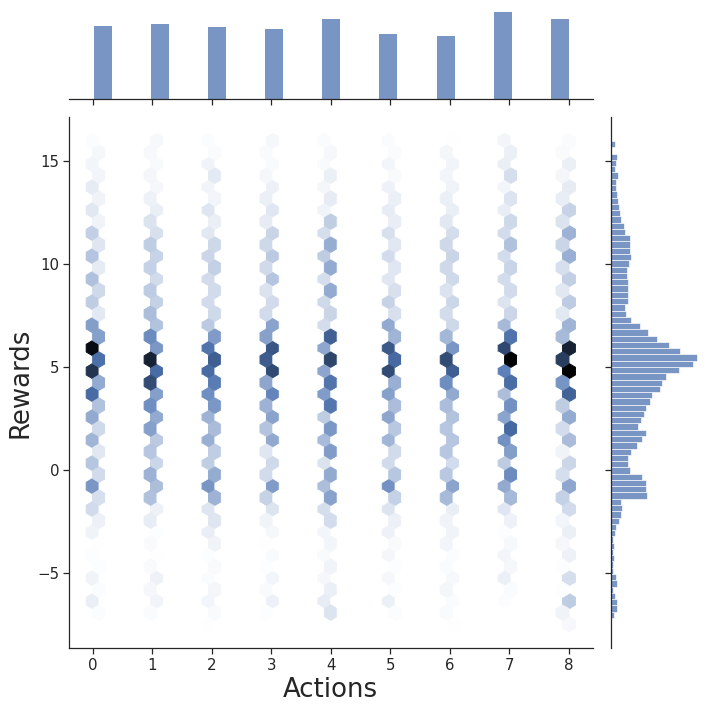

In [15]:



sns.reset_orig()

sns.set(font_scale = 1.36)
# sns.set_context("talk")

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
# sns.set_style("whitegrid")

plot = sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward",height=10, kind="hex")

# g.set_axis_labels('States','Rewards',fontsize=26)

plot.set_axis_labels('Actions','Rewards',fontsize=26)
plt.savefig("RQ1_pedestrian_3.jpg", bbox_inches = "tight")



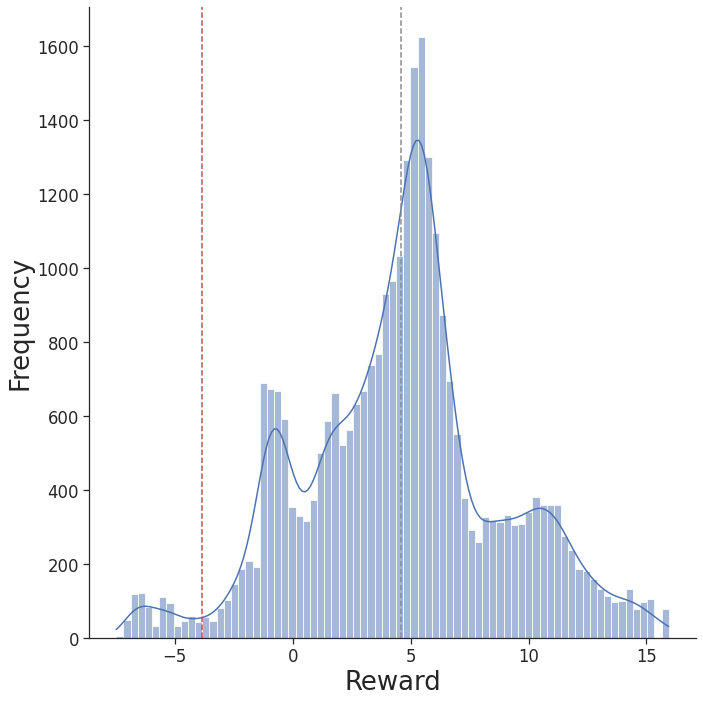

In [16]:

sns.reset_orig()
sns.set(font_scale = 1.5)

color = sns.color_palette()

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
# sns.set_style("whitegrid")



plot =  sns.displot(data=info_car2PPO_episode_1, x="reward", kde=True,height=10,color=color[0])
plt.axvline(m, color=color[7], linestyle='dashed')
# plt.axvline(m+sd, color='y', linestyle='dashed')
# plt.axvline(m-sd, color='y', linestyle='dashed')

# plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color=color[3], linestyle='dashed')
plot.set_axis_labels('Reward','Frequency',fontsize=26)
plt.savefig("RQ1_pedestrian_4.jpg", bbox_inches = "tight")



### RQ3

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


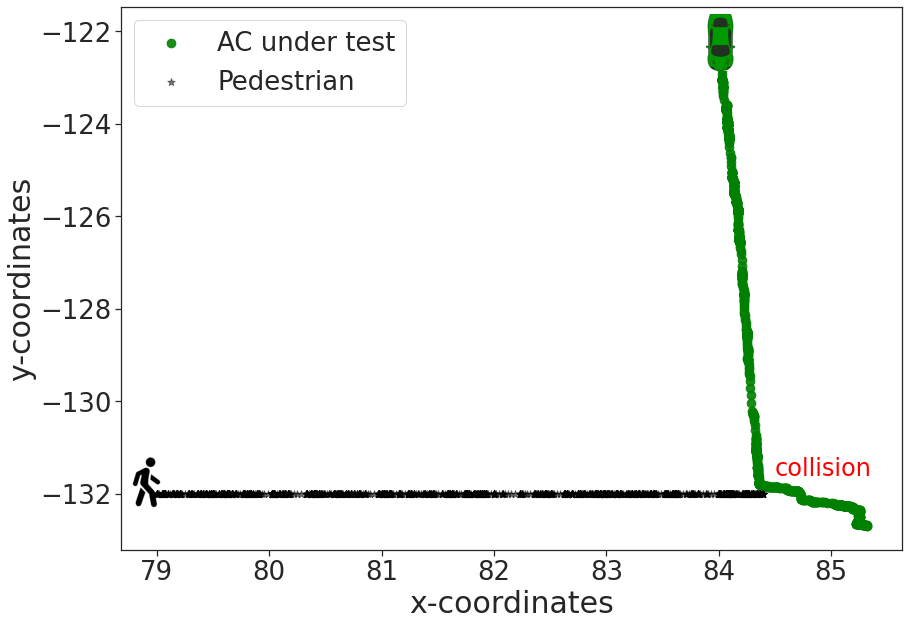

In [17]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)

# ax1.scatter(info_car2['x'][3001:4500], info_car2['y'][3001:4500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian['x'][3001:4500],info_pedestrian['y'][3001:4500], s=10, c='r', marker="o", label='car3')


# # ax1.scatter(info_car2['x'][9001:10500], info_car2['y'][9001:10500], s=10, c='b', marker="o", label='car2')
# # ax1.scatter(info_pedestrian['x'][9001:10500],info_pedestrian['y'][9001:10500], s=10, c='r', marker="o", label='car3')

# # ax1.scatter(info_car2['x'][12001:13500], info_car2['y'][12001:13500],s=300, c='green', marker=".", label='car2',alpha =0.08,)
# # ax1.scatter(info_pedestrian['x'][12001:13500],info_pedestrian['y'][12001:13500], s=60, c='black', marker="*", label='pedestrian',alpha =0.1,)

# # ax1.scatter(info_car2['x'][16501:17500], info_car2['y'][16501:17500], s=10, c='b', marker="o", label='car2')
# # ax1.scatter(info_pedestrian['x'][16501:17500],info_pedestrian['y'][16501:17500], s=10, c='r', marker="o", label='car3')


# # ax1.scatter(info_car2['x'][20501:22000], info_car2['y'][20501:22000], s=10, c='b', marker="o", label='car2')
# # ax1.scatter(info_pedestrian['x'][20501:22000],info_pedestrian['y'][20501:22000], s=10, c='r', marker="o", label='car3')

# # Text Annotate




# plt.legend(loc='upper left')
# plt.show()

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][3001:4500], info_car2['y'][3001:4500], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)
ax1.scatter(info_pedestrian['x'][3001:4500],info_pedestrian['y'][3001:4500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)



plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

plt.text(84.5, -131.6, "collision", horizontalalignment='left', size='24', color='red',fontname='Comic Sans MS')


im = Image.open('imge_1_90.jpg')
newax = fig.add_axes([0.705, 0.79, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('pedestrian.png')
newax1 = fig.add_axes([0.12, 0.18, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')


plt.savefig("RQ3_pedestrian_1.jpg", bbox_inches = "tight")


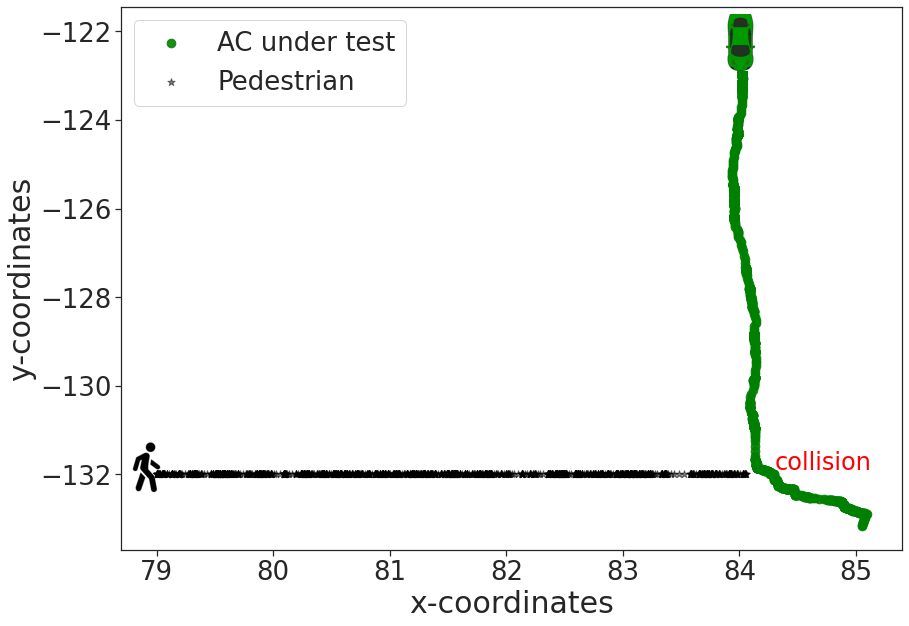

In [18]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)

# # ax1.scatter(info_car2['x'][3001:4500], info_car2['y'][3001:4500], s=10, c='b', marker="o", label='car2')
# # ax1.scatter(info_pedestrian['x'][3001:4500],info_pedestrian['y'][3001:4500], s=10, c='r', marker="o", label='car3')
# # ax1.scatter(info_car2['x'][13001:14500], info_car2['y'][13001:14500], s=10, c='b', marker="o", label='car2')
# # ax1.scatter(info_pedestrian['x'][13001:14500],info_pedestrian['y'][13001:14500], s=10, c='r', marker="o", label='car3')

# ax1.scatter(info_car2['x'][9001:10500], info_car2['y'][9001:10500], s=10, c='b', marker="o", label='car2')
# ax1.scatter(info_pedestrian['x'][9001:10500],info_pedestrian['y'][9001:10500], s=10, c='r', marker="o", label='car3')

# # ax1.scatter(info_car2['x'][12001:13500], info_car2['y'][12001:13500],s=300, c='green', marker=".", label='car2',alpha =0.08,)
# # ax1.scatter(info_pedestrian['x'][12001:13500],info_pedestrian['y'][12001:13500], s=60, c='black', marker="*", label='pedestrian',alpha =0.1,)

# # ax1.scatter(info_car2['x'][16501:17500], info_car2['y'][16501:17500], s=10, c='b', marker="o", label='car2')
# # ax1.scatter(info_pedestrian['x'][16501:17500],info_pedestrian['y'][16501:17500], s=10, c='r', marker="o", label='car3')


# # ax1.scatter(info_car2['x'][20501:22000], info_car2['y'][20501:22000], s=10, c='b', marker="o", label='car2')
# # ax1.scatter(info_pedestrian['x'][20501:22000],info_pedestrian['y'][20501:22000], s=10, c='r', marker="o", label='car3')

# # Text Annotate




# plt.legend(loc='upper left')
# plt.show()


fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][9001:10500], info_car2['y'][9001:10500], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)
ax1.scatter(info_pedestrian['x'][9001:10500],info_pedestrian['y'][9001:10500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

plt.text(84.3, -131.9, "collision", horizontalalignment='left', size='24', color='red',fontname='Comic Sans MS')


im = Image.open('imge_1_90.jpg')
newax = fig.add_axes([0.725, 0.79, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('pedestrian.png')
newax1 = fig.add_axes([0.12, 0.2, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')


plt.savefig("RQ3_pedestrian_2.jpg", bbox_inches = "tight")


In [7]:

# sns.reset_orig()
# sns.set(font_scale = 1.5)
# plot =  sns.displot(data=info_car2PPO_episode_1, x="reward", kde=True,height=8)
# plt.axvline(m, color='k', linestyle='dashed')
# # plt.axvline(m+sd, color='y', linestyle='dashed')
# # plt.axvline(m-sd, color='y', linestyle='dashed')

# # plt.axvline(m + 2*sd, color='y', linestyle='dashed')
# plt.axvline(m - 2*sd, color='y', linestyle='dashed')
# plot.set_axis_labels('Reward','Frequency',fontsize=26)





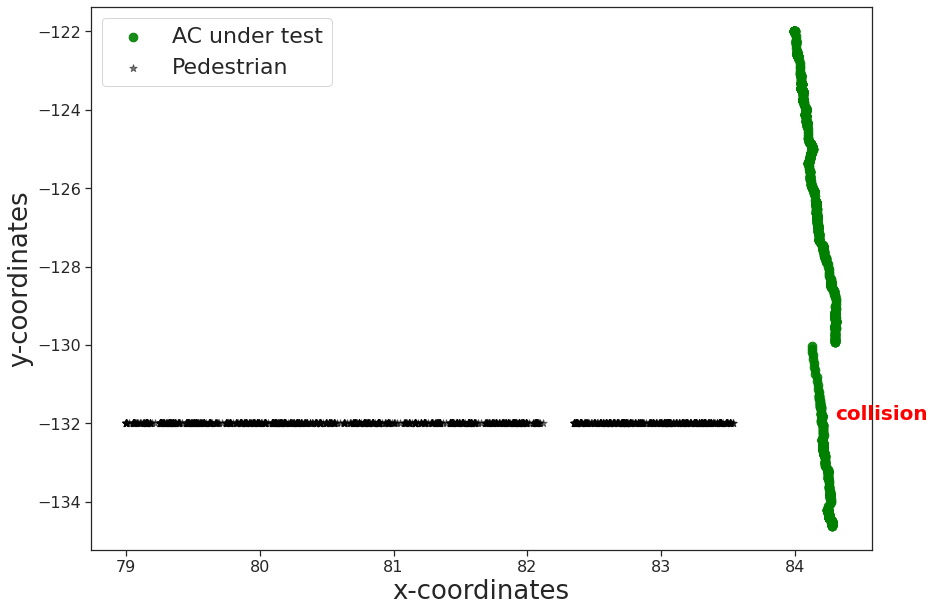

In [21]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)

# # ax1.scatter(info_car2['x'][3001:4500], info_car2['y'][3001:4500], s=10, c='b', marker="o", label='car2')
# # ax1.scatter(info_pedestrian['x'][3001:4500],info_pedestrian['y'][3001:4500], s=10, c='r', marker="o", label='car3')
# # ax1.scatter(info_car2['x'][13001:14500], info_car2['y'][13001:14500], s=10, c='b', marker="o", label='car2')
# # ax1.scatter(info_pedestrian['x'][13001:14500],info_pedestrian['y'][13001:14500], s=10, c='r', marker="o", label='car3')

# # ax1.scatter(info_car2['x'][9001:10500], info_car2['y'][9001:10500], s=10, c='b', marker="o", label='car2')
# # ax1.scatter(info_pedestrian['x'][9001:10500],info_pedestrian['y'][9001:10500], s=10, c='r', marker="o", label='car3')

# # ax1.scatter(info_car2['x'][12001:13500], info_car2['y'][12001:13500],s=300, c='green', marker=".", label='car2',alpha =0.08,)
# # ax1.scatter(info_pedestrian['x'][12001:13500],info_pedestrian['y'][12001:13500], s=60, c='black', marker="*", label='pedestrian',alpha =0.1,)

# # ax1.scatter(info_car2['x'][16501:17500], info_car2['y'][16501:17500], s=10, c='b', marker="o", label='car2')
# # ax1.scatter(info_pedestrian['x'][16501:17500],info_pedestrian['y'][16501:17500], s=10, c='r', marker="o", label='car3')


# ax1.scatter(info_car2['x'][20501:22000], info_car2['y'][20501:22000],s=300, c='green', marker=".", label='car2',alpha =0.08,)
# ax1.scatter(info_pedestrian['x'][20501:22000],info_pedestrian['y'][20501:22000], s=260, c='black', marker="*", label='pedestrian',alpha =0.1,)


# # Text Annotate




# plt.legend(loc='upper left')
# plt.show()

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car2['x'][20501:22000], info_car2['y'][20501:22000], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)
ax1.scatter(info_pedestrian['x'][20501:22000],info_pedestrian['y'][20501:22000], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)


plt.legend(loc='upper left', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
plt.text(84.3, -131.9, "collision", horizontalalignment='left', size='20', color='red', weight='semibold')

plt.savefig("RQ3_pedestrian_3.pdf")
